[[  0.   0.   0. ...   0.   0.   0.]
 [  0. -10. -10. ...  18.  28.   0.]
 [  0. -36. -36. ...  22.  28.   0.]
 ...
 [  0.   3.  -1. ... -80. -67.   0.]
 [  0.   4.   1. ... -82. -73.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[[  0.   0.   0. ...   0.   0.   0.]
 [  0.  92.  64. ...  28.  30.   0.]
 [  0. 150. 126. ...  32.  34.   0.]
 ...
 [  0.  -3.  -1. ...   6.   1.   0.]
 [  0.   0.   1. ...  10.   7.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


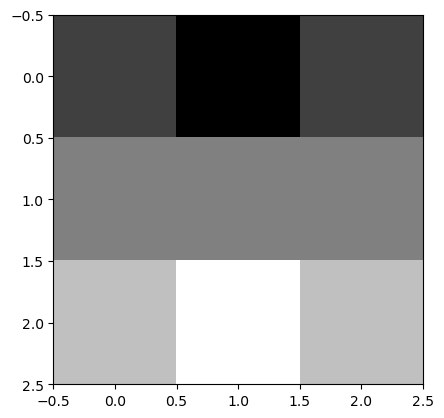

In [21]:
import cv2 
import os
import numpy as np
from matplotlib import pyplot as plt

class line_detection:
    def __init__(self, loc, output_dir, detection_type, kernel):
        # Read the input image
        self.image = cv2.imread(loc, cv2.IMREAD_GRAYSCALE)
        
        if detection_type == 'line':
            if kernel == 'horizontal':
                H = self.kernel_horizontal()
            elif kernel == 'vertical':
                H = self.kernel_vertical()
            elif kernel == '+45':
                H = self.kernel_plus45()
            elif kernel == '-45':
                H = self.kernel_minus45()
            else:
                raise ValueError("Invalid method. Use 'horizontal', 'vertical', '+45' or '-45'.")
        if detection_type == 'edge':
            if kernel == 'laplacian':
                H = self.kernel_horizontal()
            elif kernel == 'sobel':
                H1 = self.kernel_sobel_vertical()
                H2 = self.kernel_sobel_horizontal()
            else:
                raise ValueError("Invalid method. Use 'laplacian' or 'sobel'.")
        
        


        # Performing FFT on the original image
        self.img_rows, self.img_cols = self.image.shape
        
        if kernel == 'sobel':
            print(self.Filter(H1))
            print(self.Filter(H2))
            output = self.Filter(H1)+self.Filter(H2)
        else:
            output = self.Filter(H)

 
        output_path = os.path.join(output_dir, 'sobel.png')
        cv2.imwrite(output_path, output) 

        
        #op = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        #plt.subplot(131), plt.imshow(self.image, cmap = 'gray'), plt.title('Original Image')
        #plt.subplot(132), plt.imshow(output, cmap = 'gray'), plt.title(f'{kernel.capitalize()} {detection_type} detection')
        #plt.subplot(133), 
        plt.imshow(H2, cmap = 'gray')
        #plt.imshow(H2, cmap = 'gray')
        #plt.subplots_adjust(wspace=0.4)
        
    def Filter(self,H):
        self.k_rows, self.k_cols = H.shape
        output = np.zeros((self.img_rows, self.img_cols))
        for i in range(self.img_rows - self.k_rows + 1):
            for j in range(self.img_cols - self.k_cols + 1):
                area = self.image[i:i+self.k_rows, j:j+self.k_cols]
                conv = np.sum(np.multiply(area, H))
                output[i + self.k_rows//2, j + self.k_cols//2] = conv
        return output
        
    def kernel_horizontal(self):
        H = np.array([
        [-1, -1, -1],
        [2, 2, 2],
        [-1, -1, -1]

        ], dtype=np.float32)
        return H
    def kernel_vertical(self):
        H = np.array([
        [-1, 2, -1],
        [-1, 2, -1],
        [-1, 2, -1]

        ], dtype=np.float32)
        return H
    def kernel_plus45(self):
        H = np.array([
        [2, -1, -1],
        [-1, 2, -1],
        [-1, -1, 2]

        ], dtype=np.float32)
        return H
    def kernel_minus45(self):
        H = np.array([
        [-1, -1, 2],
        [-1, 2, -1],
        [2, -1, -1]

        ], dtype=np.float32)
        return H
    def kernel_laplacian(self):
        H = np.array([
        [-1, -1, 2],
        [-1, 2, -1],
        [2, -1, -1]

        ], dtype=np.float32)
        return H
    def kernel_sobel_horizontal(self):
        H = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]

        ], dtype=np.float32)
        return H
    def kernel_sobel_vertical(self):
        H = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]

        ], dtype=np.float32)
        return H
    
# Example usage:
loc = r'im3.webp'
output_dir =r'C:\Users\Tanjib Ahmed\Desktop\CCCC\image\4'
line_detection(loc = loc, output_dir = output_dir, detection_type = 'edge', kernel = 'sobel')



In [ ]:
 
        output_path = os.path.join(output_dir, 'inputLineedge.png')
        cv2.imwrite(output_path, self.image)

        output_path = os.path.join(output_dir, f'{kernel.capitalize()} {detection_type} detection.png')
        cv2.imwrite(output_path, output)

        output_path = os.path.join(output_dir, f'{kernel.capitalize()}.png')
        cv2.imwrite(output_path, H)
        #op = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        plt.subplot(131), plt.imshow(self.image, cmap = 'gray'), plt.title('Original Image')
        plt.subplot(132), plt.imshow(output, cmap = 'gray'), plt.title(f'{kernel.capitalize()} {detection_type} detection')
        plt.subplot(133), plt.imshow(H, cmap = 'gray'), plt.title(f'{kernel.capitalize()} kernel')
        plt.subplots_adjust(wspace=0.4)